# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:07:36.720322+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

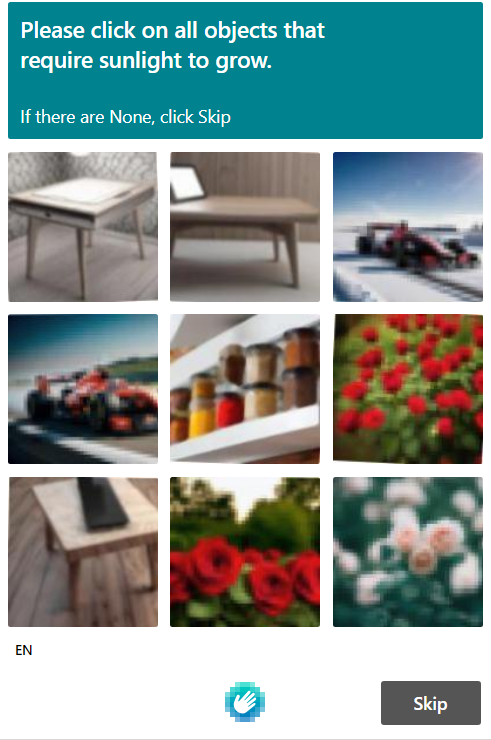

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "A blank screen with a 'Skip' button at the bottom right and a hand icon in the center.")
    describe(1, "A teal instruction box asking to click on objects that require sunlight to grow, with an option to click 'Skip' if none.")
    describe(2, "An image of white flowers with green foliage in the background.")
    describe(3, "An image of a red race car on a track.")
    describe(4, "An image of a red race car on a snowy track.")
    describe(5, "An image of a wooden table with a black object on top.")
    describe(6, "An image of shelves with jars of spices or condiments.")
    describe(7, "An image of a small wooden table with a drawer in a room with patterned wallpaper.")
    describe(8, "An image of red flowers with green foliage in the background.")
    describe(9, "An image of a wooden table with a tablet or screen on top.")
    describe(10, "An image of red roses with a blurred green background.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 0 transitions to Frame 1 when the task begins.")
    relate(1, 2, "Frame 1 provides instructions, and Frame 2 is one of the objects to evaluate.")
    relate(1, 3, "Frame 1 provides instructions, and Frame 3 is one of the objects to evaluate.")
    relate(1, 4, "Frame 1 provides instructions, and Frame 4 is one of the objects to evaluate.")
    relate(1, 5, "Frame 1 provides instructions, and Frame 5 is one of the objects to evaluate.")
    relate(1, 6, "Frame 1 provides instructions, and Frame 6 is one of the objects to evaluate.")
    relate(1, 7, "Frame 1 provides instructions, and Frame 7 is one of the objects to evaluate.")
    relate(1, 8, "Frame 1 provides instructions, and Frame 8 is one of the objects to evaluate.")
    relate(1, 9, "Frame 1 provides instructions, and Frame 9 is one of the objects to evaluate.")
    relate(1, 10, "Frame 1 provides instructions, and Frame 10 is one of the objects to evaluate.")

    # Step 3: Identify the sequential events and final visual criteria.
    objective("""
    1. Click on objects that match the criteria of requiring sunlight to grow, as per the instruction in Frame 1.
    2. Evaluate each object (Frames 2-10) based on the given criteria.
    3. If no objects match the criteria, click the 'Skip' button.
    4. The task is solved when all relevant objects are selected or 'Skip' is clicked if none are applicable.
    """)

## Structure Abstraction

In [ ]:
def stage2(frames):
    for frame in frames:
        if frame == frames[0]:  # Frame 0
            # Get the 'Skip' button and mark it as NEXT
            skip_button = frame.get_element(position="down", details="gray rectangle SKIP")
            skip_button.set_element_as(interactable="NEXT")
        
        elif frame == frames[1]:  # Frame 1
            # Mark the frame as POINTABLE for selecting matching entities
            frame.set_frame_as(interactable="POINTABLE")
        
        elif frame in frames[2:]:  # Frames 2-10
            # Mark each frame as SELECTABLE for matching entities
            frame.set_frame_as(interactable="SELECTABLE")

## Solution Composition

In [ ]:
def stage3(frames):
    # Step 1: Extract the pattern image from Frame 1
    pattern_image = frames[1].image

    # Step 2: Compare the pattern with the options in Frames 2-10
    option_images = [frame.image for frame in frames[2:11]]
    matches = compare(option_images, "Does this match the pattern?", reference=pattern_image)

    # Step 3: Select matching frames or click 'Skip' if no matches exist
    if any(matches):
        for i, match in enumerate(matches):
            if match:
                select(frames[i + 2])  # Select the matching frame

    skip_button_frame_0 = frames[0].get_interactable(0)
    click(skip_button_frame_0)

In [ ]:
PROMPT = '''
## Objective
Given the list of items, compare them with Reference and see if it satisfies the objective: Does this match the pattern?
Output a list of (True/False) for each item.
You should follow the format answer(booleans=[True, False, ...]) to answer the question.
## Guidelines
1. Match by object type, it doesn't need to have exact visual details.
'''

Reference Item 0 Item 1 Item 2 Item 3 Item 4 Item 5 Item 6 Item 7 Item 8
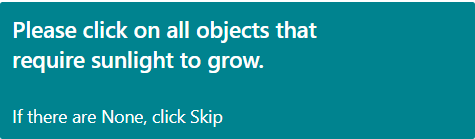
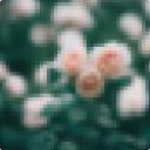
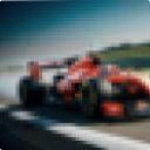
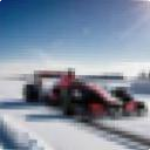
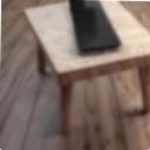
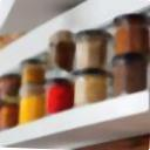
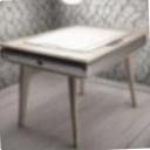
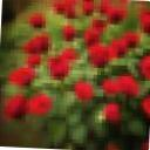
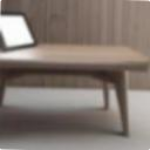
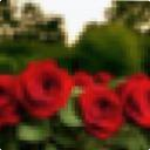

In [ ]:
IMAGES = 10

In [ ]:
RESPONSE = '''
The reference asks to identify objects that require sunlight to grow. Based on the images:

- **Item 0**: Flowers/plants - require sunlight to grow. **True**
- **Item 1**: A car - does not require sunlight to grow. **False**
- **Item 2**: A car - does not require sunlight to grow. **False**
- **Item 3**: A table - does not require sunlight to grow. **False**
- **Item 4**: Jars of spices - do not require sunlight to grow. **False**
- **Item 5**: A table - does not require sunlight to grow. **False**
- **Item 6**: Flowers/plants - require sunlight to grow. **True**
- **Item 7**: A table - does not require sunlight to grow. **False**
- **Item 8**: Flowers/plants - require sunlight to grow. **True**

### Final Answer:
```python
answer(booleans=[True, False, False, False, False, False, True, False, True])
```
'''
TIME = 4.422612222842872
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 2674
PROMPT_TOKENS = 2445
COMPLETION_TOKENS = 229

---